In [2]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

In [3]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_institution USING (institution_niicode)
WHERE grantaward.startfiscalyear >= 2009
AND grantaward.category_niicode = 69
'''
df = pd.read_sql_query(sql, engine)

In [4]:
pivot = pd.crosstab([df['category_name'], df['section_name']], df['startfiscalyear'])
pivot

startfiscalyear             2014  2015  2016  2017  2018
category_name section_name                              
基盤研究(B)       一般            2383  2446  2609  2563  2965
              海外学術           198   192   203   167     0
              特設分野            42    87   117    86     0

Text(0,0.5,'採択件数')

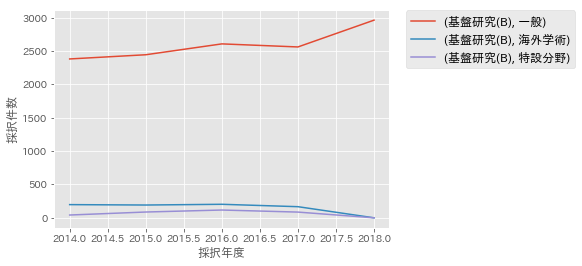

In [5]:
pivot = pivot.T
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.xlabel("採択年度")
plt.ylabel("採択件数")

In [9]:
df = df.query('section_niicode == 17')

In [10]:
teidaicode = [10101, 11301, 12601, 13901, 14301, 14401, 17102, 15301, 13101, 23903, 22701, 24402]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2014,2015,2016,2017,2018
institution_name,,,,,
東京大学,156,181,161,187,248
京都大学,177,143,145,162,206
大阪大学,124,115,113,117,134
東北大学,116,128,146,112,134
北海道大学,84,84,92,90,108
名古屋大学,84,81,92,90,108
九州大学,79,80,93,85,103
岡山大学,42,29,27,25,33
新潟大学,18,21,22,34,30


(0, 260.2)

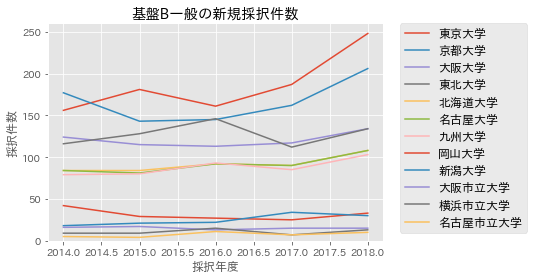

In [12]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('基盤B一般の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)

In [6]:
teidaicode = [15301, 13101, 23903, 22701, 24402]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2014,2015,2016,2017,2018
institution_name,,,,,
岡山大学,43,31,29,27,33
新潟大学,23,21,26,35,30
大阪市立大学,19,17,20,17,15
横浜市立大学,9,10,16,8,13
名古屋市立大学,5,4,12,8,10


(0, 44.95)

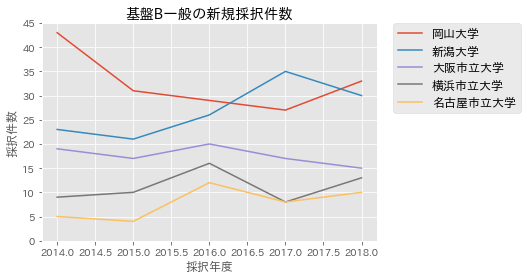

In [7]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('基盤B一般の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)